import libraries


In [3]:
import cv2
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Import the dicom image

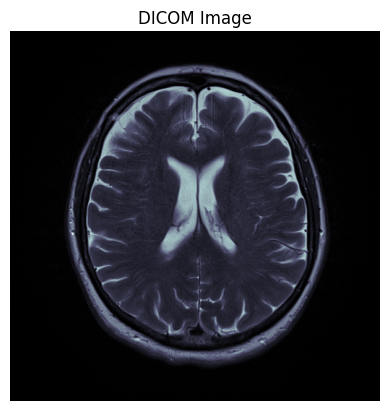

In [4]:
#read the DICOM file
filename = pydicom.dcmread('/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/Head_MRI.dcm')

#read the image pixel values
mri = filename.pixel_array

# Display the image
plt.imshow(mri, cmap=plt.cm.bone)
plt.title("DICOM Image")
plt.axis('off')
plt.show()

read other images

In [5]:
bdot =mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/blackdot.jpg")
atm =mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/atm.jpg")
box =mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/box.jpg")

Applying Gussain Noise to the image 

In [6]:
box.shape

(183, 275, 3)

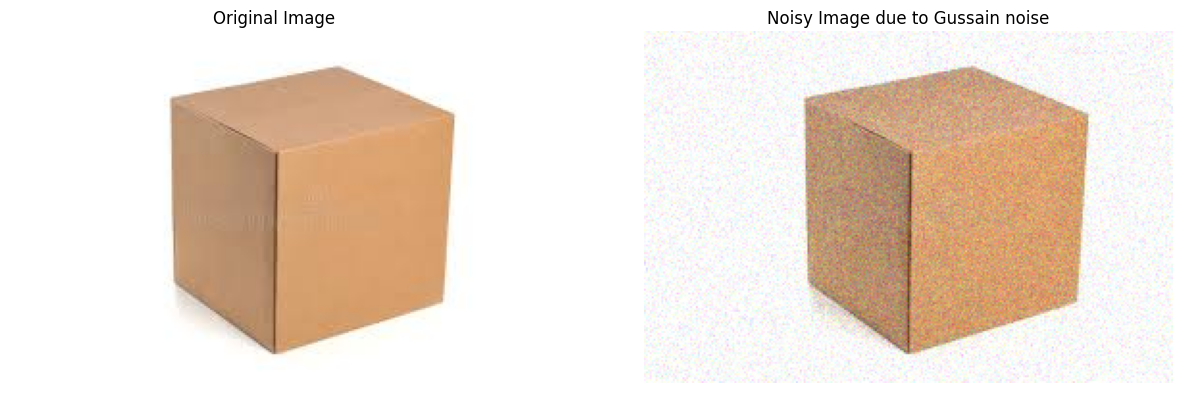

In [7]:

# Create a function for Gussain noise
def gussian_noise(img, mean, sigma):

    #creating a gussain matrix of same size as that of image
    guss_mat = np.random.normal(mean, sigma, img.shape)

    # Apply gussain noise to the image
    noise_img = img + guss_mat

    # Clip the values to the range (0-255)
    noise_img = np.clip(noise_img, 0,255)

    #convert it to the uint8
    noise_img = noise_img.astype(np.uint8)

    return noise_img

#load image 
img = box

#define gussain parameters
sigma = 15#standard deviation
mean = 00 #mean 

#Apply the gussain noise to the image
noisy_image = gussian_noise(img, mean, sigma)

# Display the original and noisy images
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Noisy Image due to Gussain noise")
plt.imshow(noisy_image)
plt.axis('off')

plt.show()


Impulse noise (salt noise,pepper noise & salt and pepper noise)

In [ ]:
#Create a function for impulse noise

def add_impulse_noise(image, noise_prob, noise_type='salt_and_pepper'):
    noisy_image = image.copy()    # Create a copy of the image to add noise to
    total_pixels = image.size    # Calculate the total number of pixels
    num_noisy_pixels = int(noise_prob * total_pixels)    # Calculate the number of noisy pixel
    noisy_indices = np.random.choice(total_pixels, num_noisy_pixels, replace=False)    # Randomly select indices for noisy pixels
    # Apply noise based on the noise type
    if noise_type == 'salt':
        noisy_image.flat[noisy_indices] = 255        # Set selected pixels to maximum intensity (salt noise)
    elif noise_type == 'pepper':
        noisy_image.flat[noisy_indices] = 0        # Set selected pixels to minimum intensity (pepper noise)
    elif noise_type == 'salt_and_pepper':
        # Randomly set selected pixels to either maximum or minimum intensity
        noisy_pixel_values = np.random.choice([0, 255], num_noisy_pixels)
        noisy_image.flat[noisy_indices] = noisy_pixel_values
    return noisy_image

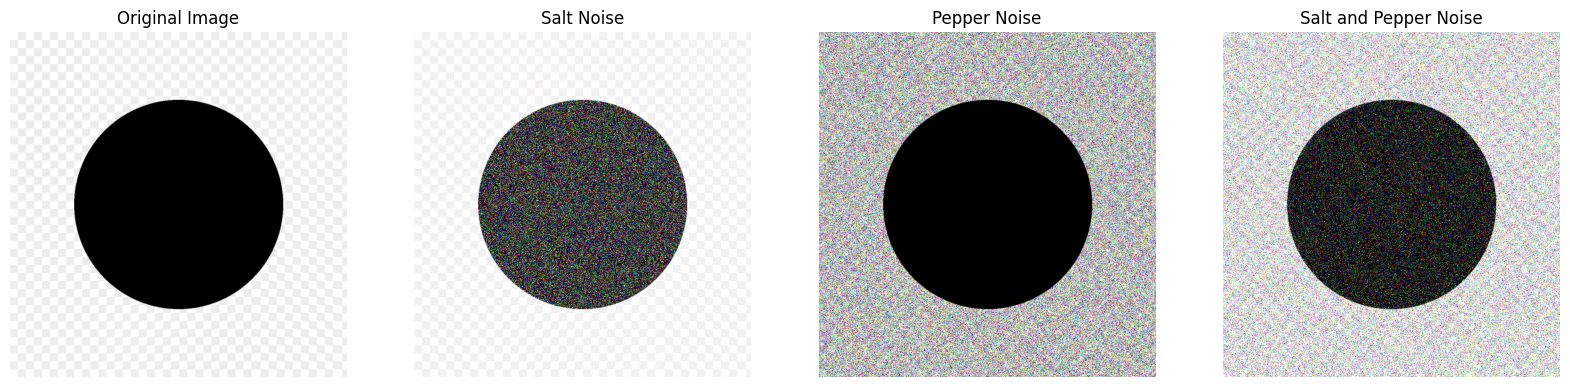

In [27]:
# Load the image
image = bdot

# Add impulse noise
noisy_image_salt = add_impulse_noise(image, noise_prob=0.25, noise_type='salt')
noisy_image_pepper = add_impulse_noise(image, noise_prob=0.25, noise_type='pepper')
noisy_image_salt_and_pepper = add_impulse_noise(image, noise_prob=0.25, noise_type='salt_and_pepper')

# Display the original and noisy images

plt.figure(figsize=(20,20))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Salt Noise")
plt.imshow(noisy_image_salt, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Pepper Noise")
plt.imshow(noisy_image_pepper, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Salt and Pepper Noise")
plt.imshow(noisy_image_salt_and_pepper, cmap='gray')
plt.axis('off')

plt.show()


Applying the poission noise

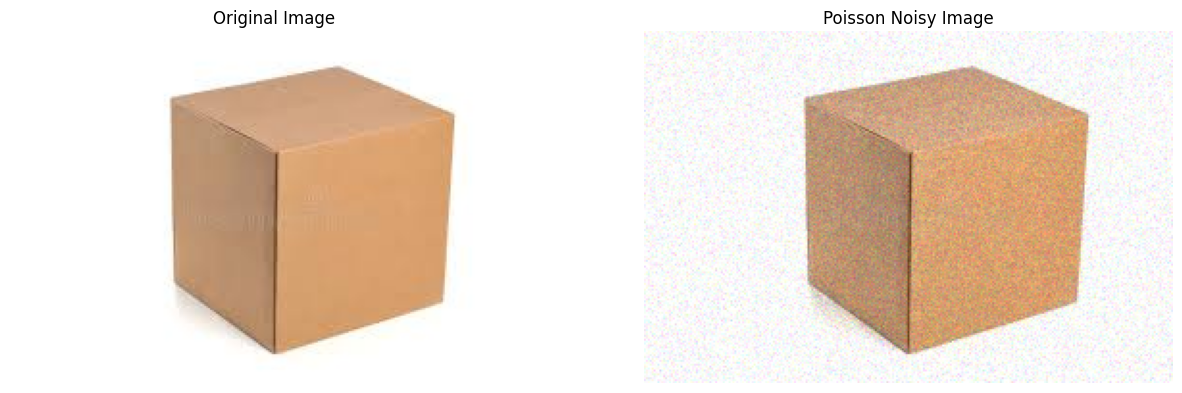

In [ ]:
#function to add Poisson noise to an image
def add_poisson_noise(image):

    # Convert the image to floating point format
    image_float = image.astype(np.float32)

    # Generate Poisson noise
    noisy_image = np.random.poisson(image_float) #np.random.poisson function expects a floating-point as input 

    # Normalize the noisy image to the range [0, 1]
    noisy_image = noisy_image /255.0

    # Clip the pixel values to be within the valid range [0, 1]
    noisy_image = np.clip(noisy_image, 0, 1)

    # Convert back to uint8
    noisy_image = (noisy_image * 255).astype(np.uint8)

    return noisy_image

# Load the image
img = box

# Add Poisson noise
noisy_image_poisson = add_poisson_noise(img)

# Display the original and noisy images
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Poisson Noisy Image")
plt.imshow(noisy_image_poisson, cmap='gray')
plt.axis('off')

plt.show()


Apply speckle noise

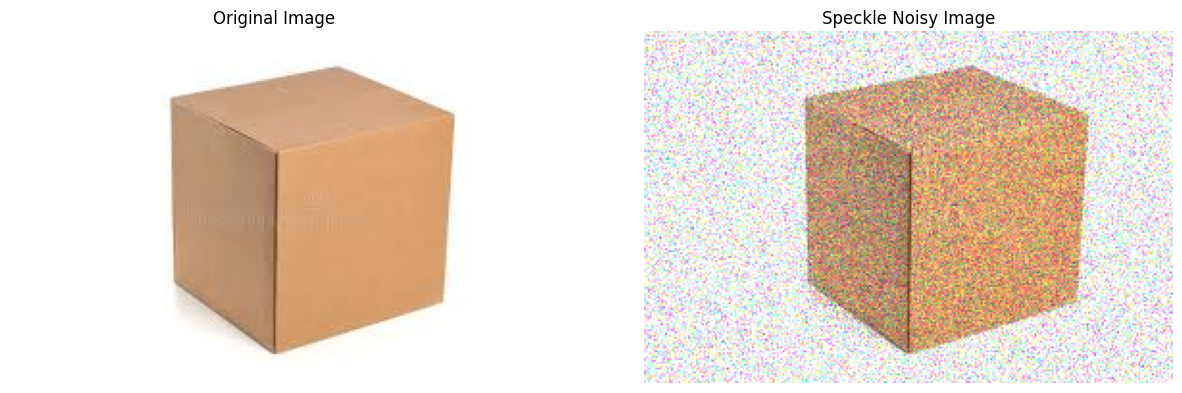

In [57]:
# function to add speckle noise
def add_speckle_noise(image, level=0.15): # level controls the noise intensity (0-1)
    # Convert the image to floating point
    image_float = image.astype(np.float32) / 255.0

    h,w,ch = image_float.shape

    # Generate speckle noise
    noise = np.random.randn(h,w,ch) * level  # Adjust the noise level as needed

    noisy_image = image_float + image_float * noise

    # Clip the pixel values to be within the valid range [0, 1]
    noisy_image = np.clip(noisy_image, 0, 1)

    # Convert back to uint8
    noisy_image = (noisy_image * 255).astype(np.uint8)

    return noisy_image

# Load the image
img = box

# Add speckle noise
noisy_image_speckle = add_speckle_noise(img, 0.2)

# Display the original and noisy images
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Speckle Noisy Image")
plt.imshow(noisy_image_speckle, cmap='gray')
plt.axis('off')

plt.show()
